In [42]:
import rosbag_pandas as rbp
import pandas as pd
import rosbag
import math
import matplotlib.pyplot as plt
import datetime
import lz4
import numpy as np

In [43]:
joint_dict = {0:'l_hip_yaw',     1:'r_hip_yaw',        2:'l_hip_roll',    3:'r_hip_roll',
              4:'l_hip_pitch',   5:'r_hip_pitch',      6:'l_knee_pitch',  7:'r_knee_pitch',
              8:'l_ankle_pitch', 9:'r_ankle_pitch',   10:'l_ankle_roll', 11:'r_ankle_roll'}

df_err = pd.DataFrame()

# compose main dataFrame with errors for each joint with each P-value of PID
for i in range(0,6):
    df = pd.read_csv('err_deg_p_' + str(800 + i*100) + '.csv', index_col=0)
    col_names = df.columns
    col_names = col_names + '_' + str(800 + i*100)
    # rename columns
    df.columns = col_names    
    df_err = df_err.append(df, sort=False)
    
for i in joint_dict:
    # declare variables with names from dict    
    vars()[joint_dict[i]] = pd.DataFrame()
    
    for j in range(0,6):
        # create a new columns in dict-named dataFrames
        (vars()[joint_dict[i]])['P_' + str(800 + j*100)] = df_err[joint_dict[i] + '_' +str(800 + j*100)]
    # remove empty NaN rows
    (vars()[joint_dict[i]]) = (vars()[joint_dict[i]]).dropna(axis=0, how='all')

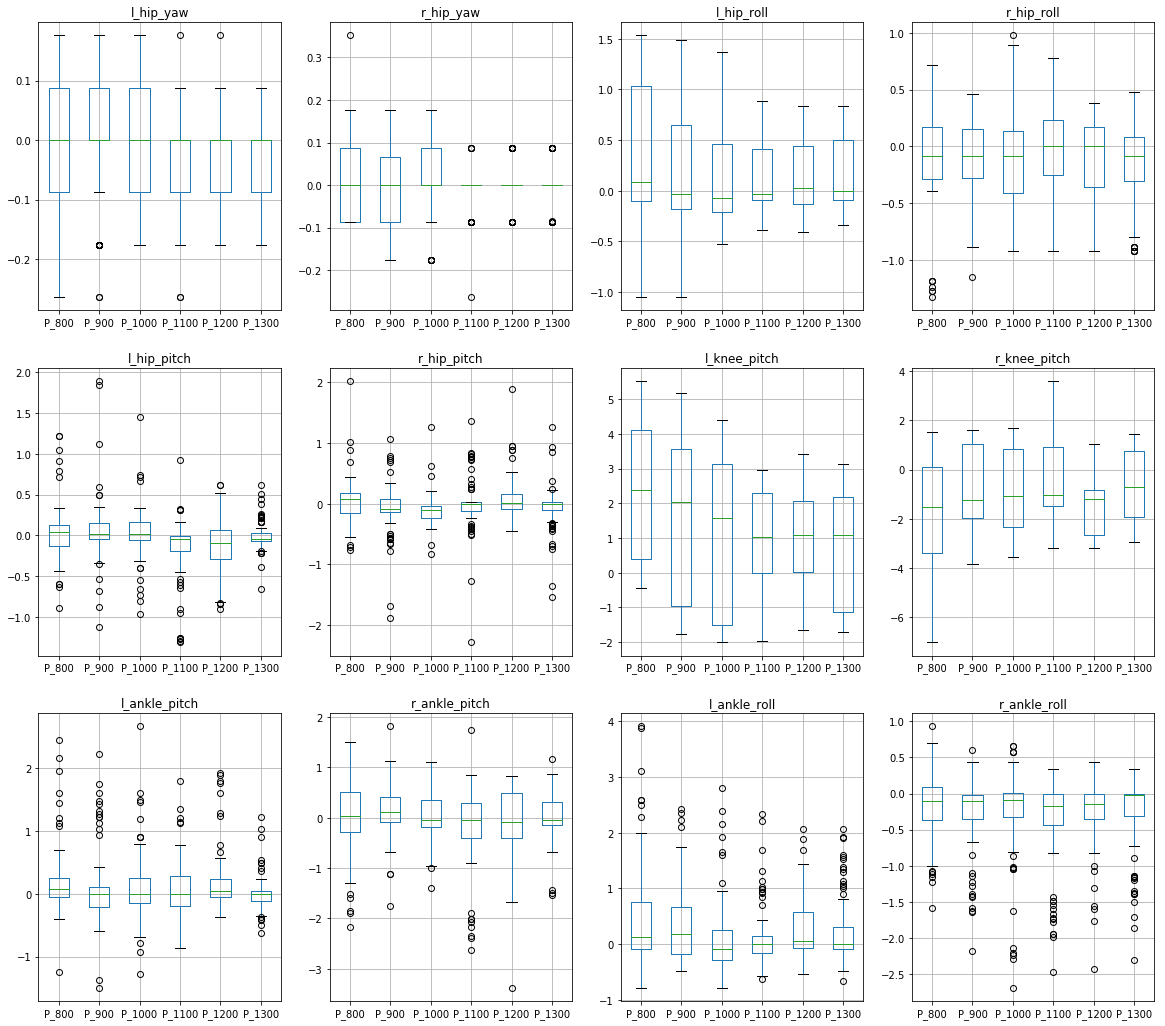

In [44]:
fig, axs = plt.subplots(3, 4, figsize=(20, 18))

m, n = 0, 0

for i in joint_dict:
    (vars()[joint_dict[i]]).boxplot(ax=axs[m,n]);
    axs[m,n].set_title(joint_dict[i]);
    
    n = n + 1
    
    if n > 3:
        m = m + 1
        n = 0

#fig, axs = plt.subplots(1, 2, figsize=(15, 10))

#(vars()[joint_dict[0]]).boxplot(ax=axs[0]);
#axs[0].set_title(joint_dict[0]);

#(vars()[joint_dict[1]]).boxplot(ax=axs[1]);
#axs[1].set_title(joint_dict[1]);